<a href="https://colab.research.google.com/github/hichanmedia/tiscon9/blob/main/3_2_boundaryline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 境界線による推定の検証

### ライブラリのインストール

In [ ]:
!pip install opencv-python-headless matplotlib

### 画像の読み込み

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


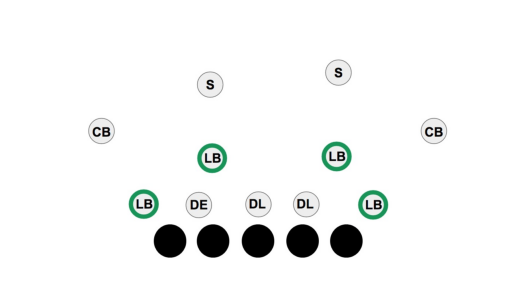

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Google ドライブをマウント
drive.mount('/content/drive')

# Google ドライブ内の画像ファイルのパスを指定
image_path = '/content/drive/My Drive/path/スライド54.JPG'

# 画像を読み込む
image = cv2.imread(image_path)

# 画像が正しく読み込まれたか確認
if image is None:
    raise ValueError(f"画像の読み込みに失敗しました。パスを確認してください: {image_path}")

# 画像をBGRからRGBに変換して表示
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
# 画像のサイズを取得
height, width, channels = image.shape
print(f"画像のサイズ: {width}x{height}, チャンネル数: {channels}")

画像のサイズ: 1280x720, チャンネル数: 3


### 画像の回転

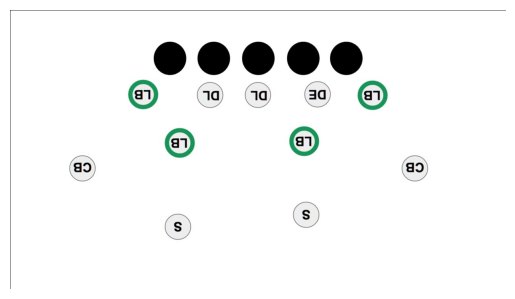

In [ ]:
# 画像の中心を基準に回転行列を作成
center = (image.shape[1] // 2, image.shape[0] // 2)
angle = 180  # 回転角度（度）
scale = 1.0  # スケール（1.0でそのままのサイズ）

# 回転行列を計算
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# 回転行列を使用して画像を回転
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# 回転後の画像をBGRからRGBに変換して表示
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(rotated_image_rgb)
plt.axis('off')
plt.show()


### 画像のエッジ検出

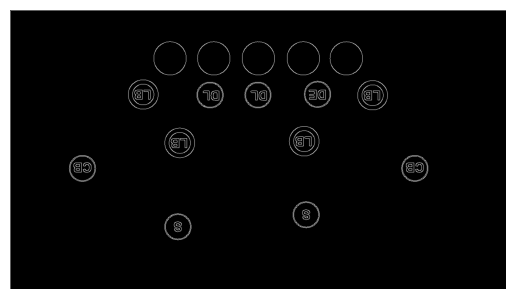

In [ ]:
# 回転後の画像でエッジ検出を実行
edges = cv2.Canny(rotated_image, 100, 200)

# エッジ検出結果を表示
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

### 指定した座標からの距離によってラベル付け

#### 境界線の記載あり・中心座標を(640,130)にしてラベルの設定

##### 境界線

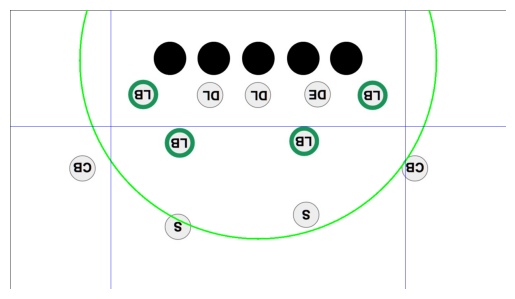

In [ ]:
# 画像をグレースケールに変換
# gray_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 基準の座標
center_x, center_y = 640, 130

# 条件に基づいて点や線を描画する関数
def draw_points_and_lines(image):
    height, width = image.shape[:2]

    # 全てのピクセル座標を生成
    y_indices, x_indices = np.indices((height, width))

    # 基準座標からの距離を計算
    distances = np.sqrt((x_indices - center_x) ** 2 + (y_indices - center_y) ** 2)

    # 条件1: 赤い点を描画
    #red_condition = ((x_indices >= 260) & (x_indices < 1020) & (y_indices == 300)) | (np.isclose(distances, 280, atol=2))
    #image[130, :] = [0, 0, 255]  # 赤色で塗りつぶし

    # 条件2: 緑の点を描画し、緑の直線を描画
    green_condition = np.isclose(distances, 460, atol=2)
    image[green_condition] = [0, 255, 0]  # 緑色で塗りつぶし

    # 条件3 : 青で境界線
    image[:, 260] = [255, 0, 0]  # x=300のところに緑の直線を描画
    image[:, 1020] = [255, 0, 0]  # x=300のところに緑の直線を描画
    image[300, :] = [255, 0, 0]  # y=300のところに緑の直線を描画

      # 画像上にx, y軸の座標を描画する（主な軸のみ）
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    color = (0, 0, 0)  # 白色
    thickness = 2

    # x軸の座標を描画（y=350の付近にx軸の値を表示）
    #for x in range(0, 1280, 100):  # 260から1020の範囲に200ピクセル間隔で表示
        #text = f"{x}"
        #cv2.putText(image, text, (x,20), font, font_scale, color, thickness, cv2.LINE_AA)
        #image[:, x] = [0, 0, 0]  # x=300のところに緑の直線を描画

    # y軸の座標を描画（x=220の付近にy軸の値を表示）
    #for y in range(0, 720, 100):  # 50から600の範囲に100ピクセル間隔で表示
        #text = f"{y}"
       # cv2.putText(image, text, (0, y), font, font_scale, color, thickness, cv2.LINE_AA)
        #image[y, :] = [0, 0, 0]

    return image

# 描画を実行
output_image = draw_points_and_lines(rotated_image)

# 画像をBGRからRGBに変換して表示
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(output_image_rgb)
plt.axis('off')
plt.show()


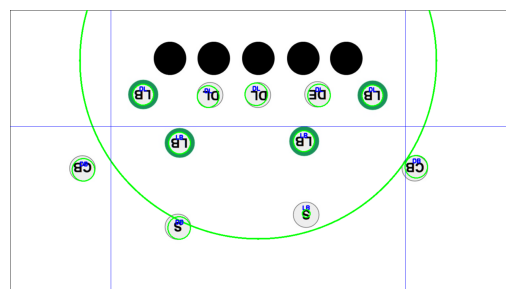

Label: LB, BBox: [x=437, y=343, r=28] is: 294.24
Label: DL, BBox: [x=343, y=218, r=27] is: 309.76
Label: LB, BBox: [x=758, y=338, r=27] is: 239.14
Label: DL, BBox: [x=935, y=220, r=27] is: 308.42
Label: DL, BBox: [x=635, y=217, r=29] is: 87.14
Label: DB, BBox: [x=1048, y=404, r=29] is: 491.47
Label: DB, BBox: [x=189, y=412, r=29] is: 531.91
Label: DL, BBox: [x=797, y=220, r=29] is: 180.97
Label: DB, BBox: [x=436, y=562, r=29] is: 477.74
Label: DL, BBox: [x=511, y=223, r=28] is: 159.03
Label: LB, BBox: [x=764, y=525, r=10] is: 414.01


In [ ]:
# 画像をグレースケールに変換
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# ハフ変換を用いて丸を検出
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=5, maxRadius=30)

# 検出された丸が存在する場合
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    # 画像の中心座標を計算
    #center_x, center_y = rotated_image.shape[1] // 2, 130
    center_x, center_y = 640, 130

    def predict_label(x, y):
        # 中心座標からのユークリッド距離を計算
        distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
        # 距離に基づいてラベルを付与
        if x >= 260 and x < 1020 and y < 300:
            return 'DL'
        #elif distance < 280:
            #return 'DL'
        elif distance <460: # 1回目 450 2回目 430
            return 'LB'
        else:
            return 'DB'

    # 検出された丸の位置座標を表示し、ラベルを予測して表示
    for (x, y, r) in circles:
        label = predict_label(x, y)
        cv2.putText(rotated_image, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.circle(rotated_image, (x, y), r, (0, 255, 0), 2)

    # 画像をBGRからRGBに変換して表示
    image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    # 検出された丸の位置座標とラベルを表示
    for (x, y, r) in circles:
        label = predict_label(x, y)
        print(f'Label: {label}, BBox: [x={x}, y={y}, r={r}] is: {np.sqrt((x - center_x)**2 + (y - center_y)**2):.2f}')
else:
    print("丸が検出されませんでした。")